In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB
None
         magnitude        depth          cdi          mmi          sig
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000
mean      7.061008    50.321538     6.976154     6.939231    -9.749231
std       0.423738   104.348286     2.244875     1.354774    62.245214
min       6.500000     2.000000     0.000000     1.000000  -128.000000
25%       6.700000    12.000000     6.000000     6.000000   -54.000000
50%       7.000000    19.000000     8.000000     7.000000    -7.000000
75%       7.300000 

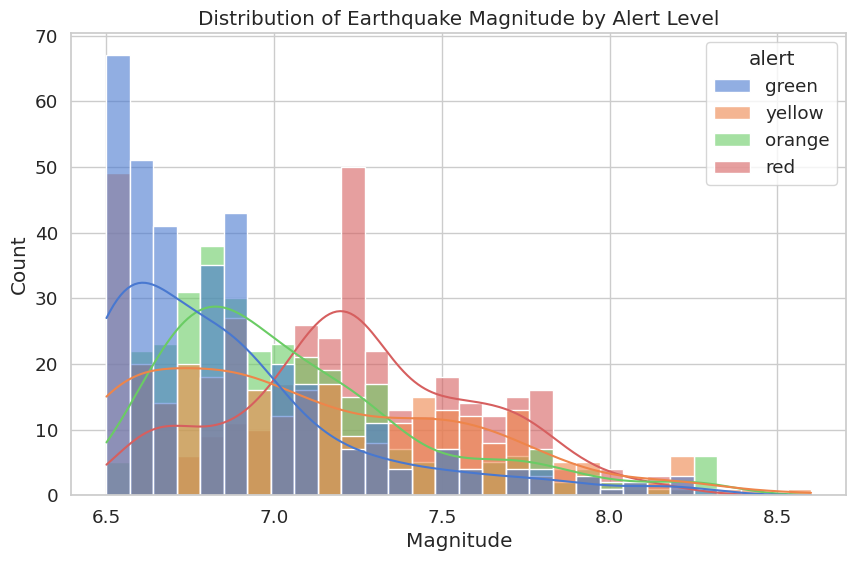

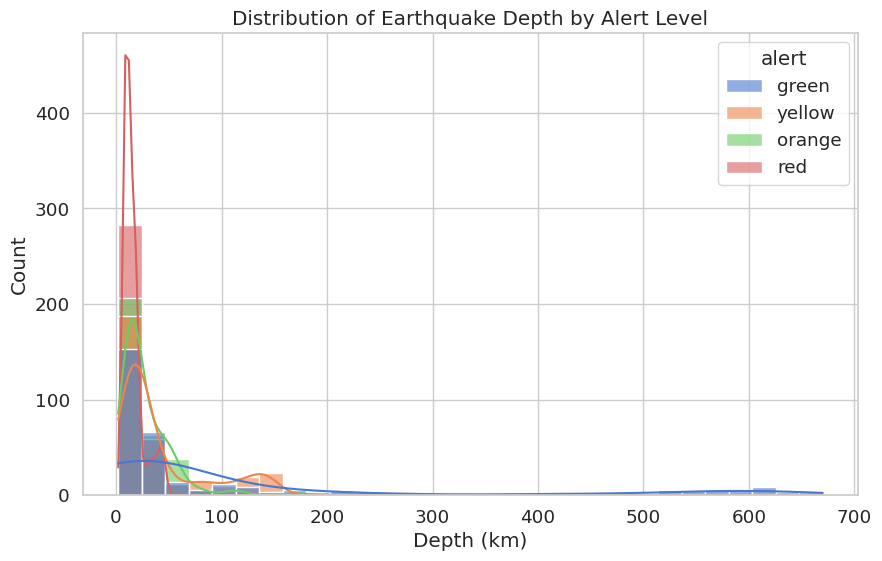

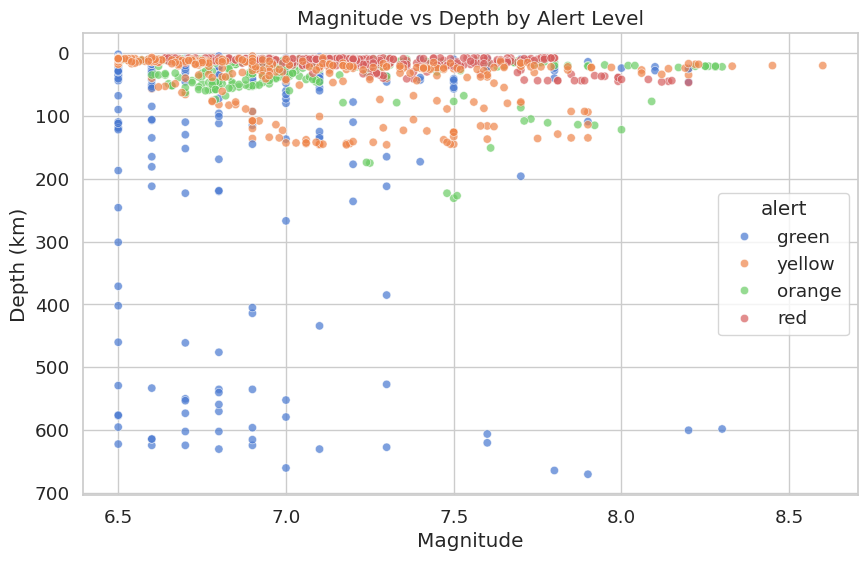

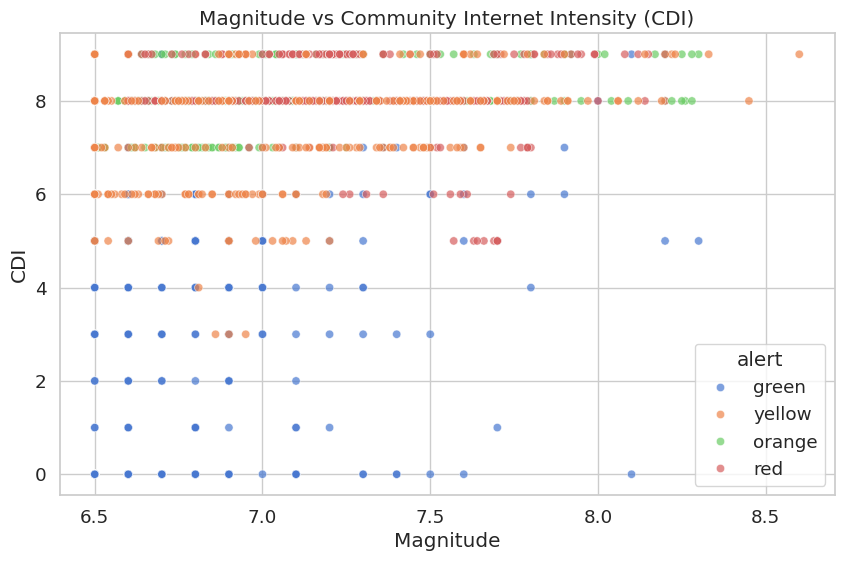

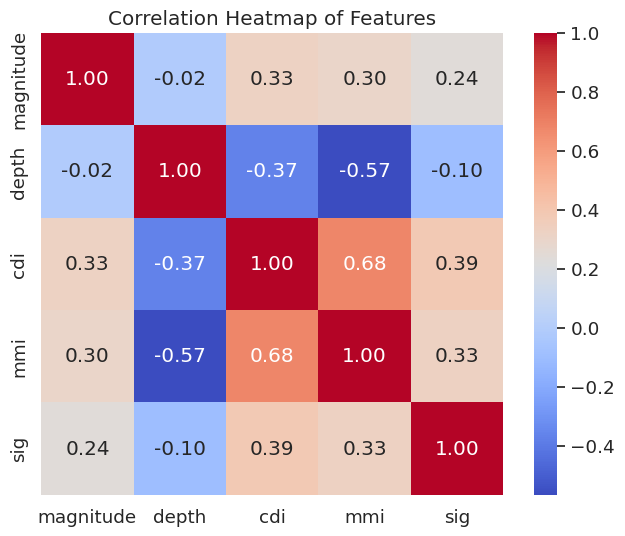

/tmp/ipython-input-1223766726.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="alert", y="magnitude", palette="Set2")


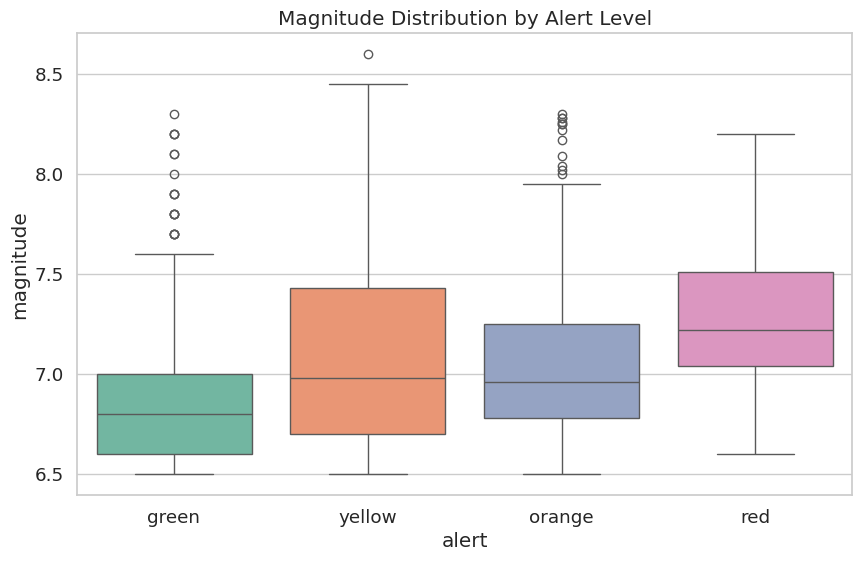

/tmp/ipython-input-1223766726.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="alert", y="depth", palette="Set2")


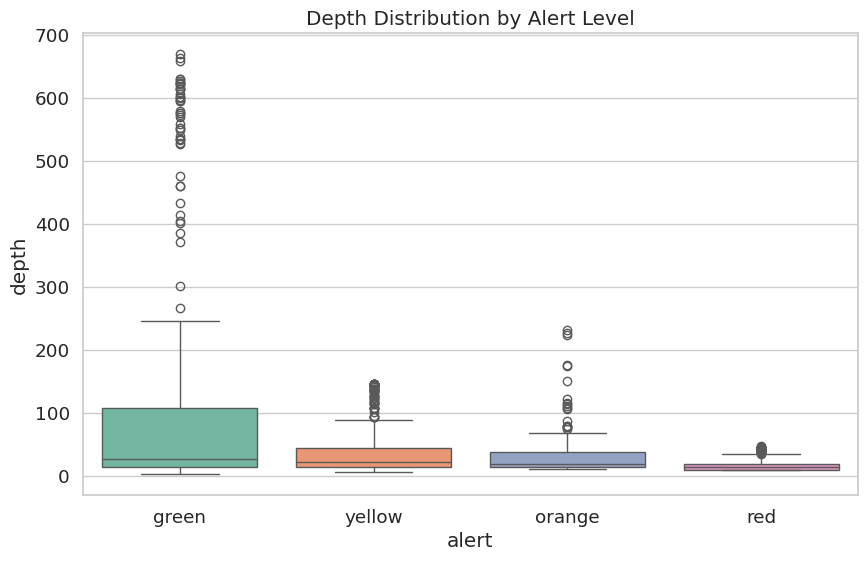

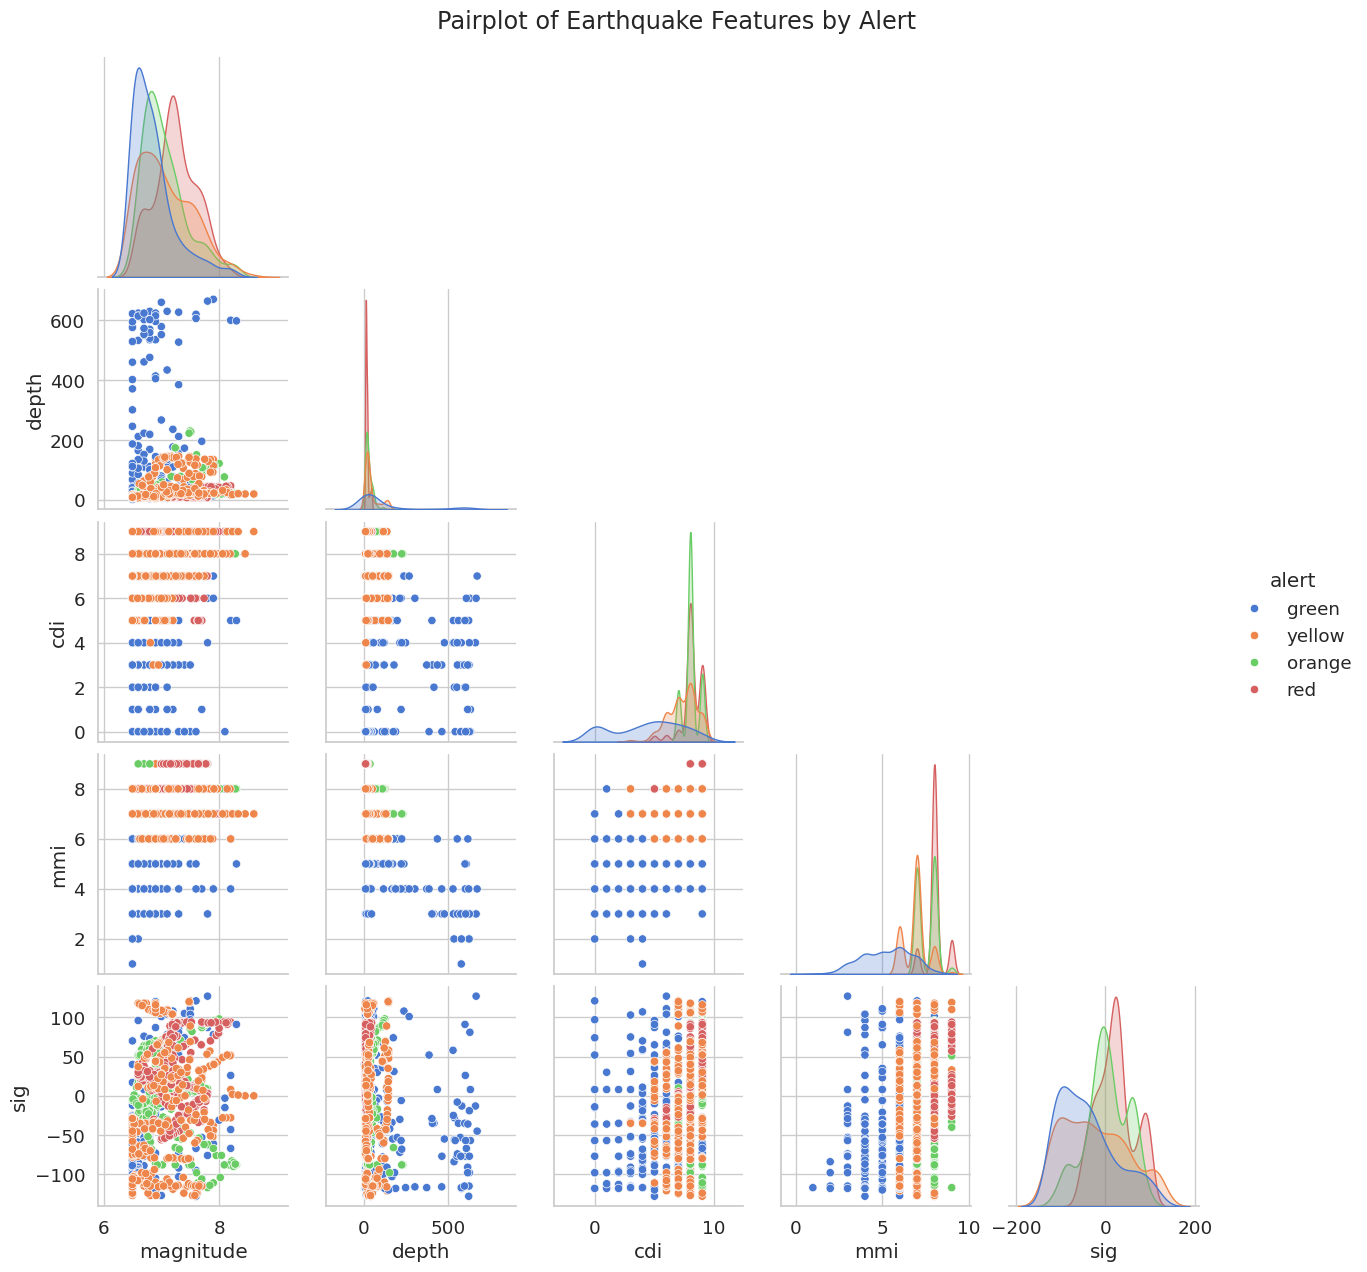

   magnitude  depth  cdi  mmi   sig depth_category  energy_release  \
0        7.0   14.0  8.0  7.0   0.0        shallow    1.995262e+15   
1        6.9   25.0  4.0  4.0 -33.0        shallow    1.412538e+15   
2        7.0  579.0  3.0  3.0 -13.0           deep    1.995262e+15   
3        7.3   37.0  5.0  5.0  65.0        shallow    5.623413e+15   
4        6.6  624.0  0.0  2.0 -98.0           deep    5.011872e+14   

   mag_depth_ratio magnitude_bin depth_bin  mag_x_cdi  mag_x_mmi  log_depth  \
0         0.466667        Strong   Shallow       56.0       49.0   2.708050   
1         0.265385        Strong   Shallow       27.6       27.6   3.258097   
2         0.012069        Strong      Deep       21.0       21.0   6.363028   
3         0.192105         Major   Shallow       36.5       36.5   3.637586   
4         0.010560        Strong      Deep        0.0       13.2   6.437752   

   log_energy  
0   35.229552  
1   34.884164  
2   35.229552  
3   36.265715  
4   33.848001  
Train sh

In [5]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

df = pd.read_csv("earthquake_alert_balanced_dataset.csv")

print(df.info())
print(df.describe())
print(df['alert'].value_counts())


# Distribution Plots
# Histogram: Magnitude by Alert
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="magnitude", hue="alert", bins=30, kde=True, alpha=0.6)
plt.title("Distribution of Earthquake Magnitude by Alert Level")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()

# Histogram: Depth by Alert
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="depth", hue="alert", bins=30, kde=True, alpha=0.6)
plt.title("Distribution of Earthquake Depth by Alert Level")
plt.xlabel("Depth (km)")
plt.ylabel("Count")
plt.show()


# Scatter Plots
# Magnitude vs Depth
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="magnitude", y="depth", hue="alert", alpha=0.7)
plt.title("Magnitude vs Depth by Alert Level")
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.gca().invert_yaxis()
plt.show()

# Magnitude vs CDI
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="magnitude", y="cdi", hue="alert", alpha=0.7)
plt.title("Magnitude vs Community Internet Intensity (CDI)")
plt.xlabel("Magnitude")
plt.ylabel("CDI")
plt.show()


# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df.drop(columns="alert").corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Features")
plt.show()



# Boxplot: Magnitude by Alert
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="alert", y="magnitude", palette="Set2")
plt.title("Magnitude Distribution by Alert Level")
plt.show()

# Boxplot: Depth by Alert
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="alert", y="depth", palette="Set2")
plt.title("Depth Distribution by Alert Level")
plt.show()


sns.pairplot(df, vars=["magnitude", "depth", "cdi", "mmi", "sig"], hue="alert", diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Earthquake Features by Alert", y=1.02)
plt.show()



# 1. Depth Category (Shallow / Intermediate / Deep)
def depth_category(depth):
    if depth < 70:
        return "shallow"
    elif depth < 300:
        return "intermediate"
    else:
        return "deep"

df["depth_category"] = df["depth"].apply(depth_category)


# 2. Seismic Energy Release (approximation)
# Formula: E = 10^(1.5M + 4.8), where M is magnitude
df["energy_release"] = 10 ** (1.5 * df["magnitude"] + 4.8)


# 3. Magnitude-to-Depth Ratio
df["mag_depth_ratio"] = df["magnitude"] / (df["depth"] + 1)


# 4. Binned Features
df["magnitude_bin"] = pd.cut(
    df["magnitude"],
    bins=[0, 4, 5, 6, 7, 10],
    labels=["Minor", "Light", "Moderate", "Strong", "Major"]
)

df["depth_bin"] = pd.cut(
    df["depth"],
    bins=[0, 70, 300, 700],
    labels=["Shallow", "Intermediate", "Deep"]
)


# 5. Interaction Features
df["mag_x_cdi"] = df["magnitude"] * df["cdi"]
df["mag_x_mmi"] = df["magnitude"] * df["mmi"]


# 6. Log Transformations
df["log_depth"] = np.log1p(df["depth"])
df["log_energy"] = np.log1p(df["energy_release"])



print(df[[
    "magnitude", "depth", "cdi", "mmi", "sig",
    "depth_category", "energy_release", "mag_depth_ratio",
    "magnitude_bin", "depth_bin", "mag_x_cdi", "mag_x_mmi",
    "log_depth", "log_energy"
]].head())




df = df.dropna(subset=['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'alert'])


df['cdi'] = df['cdi'].fillna(df['cdi'].median())
df['mmi'] = df['mmi'].fillna(df['mmi'].median())
df['sig'] = df['sig'].fillna(df['sig'].median())


label_encoder = LabelEncoder()
df['alert_encoded'] = label_encoder.fit_transform(df['alert'])


df = pd.get_dummies(df, columns=['depth_category', 'magnitude_bin', 'depth_bin'], drop_first=True)


feature_columns = [
    "magnitude", "depth", "cdi", "mmi", "sig",
    "energy_release", "mag_depth_ratio", "mag_x_cdi", "mag_x_mmi",
    "log_depth", "log_energy"
]
categorical_cols = [col for col in df.columns if "depth_category_" in col or
                    "magnitude_bin_" in col or "depth_bin_" in col]

X = df[feature_columns + categorical_cols]
y = df["alert_encoded"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

